In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Reading The Data
data = pd.read_csv('data/facebook_stock.csv', index_col='Date', parse_dates = True)

In [40]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,187.500000,29197800


In [27]:
# Checking for NAN OR Missing Values
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

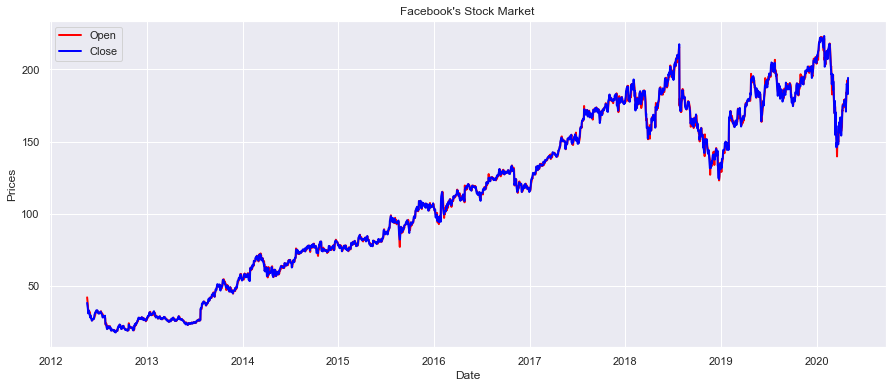

In [28]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['Open'], label='Open', linewidth=2, color='red')
plt.plot(data['Close'], label='Close', linewidth=2, color='blue')

plt.legend()
plt.show()

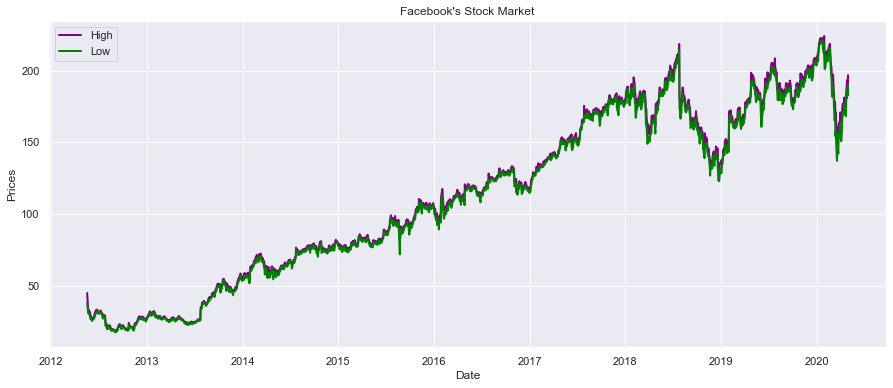

In [29]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['High'], label='High', linewidth=2, color='purple')
plt.plot(data['Low'], label='Low', linewidth=2, color='green')

plt.legend()
plt.show()

In [50]:
# Splitting The Data Into Training, Testing Data
training_data = data[data.index < '2019-01-01']
testing_data = data[data.index >= '2019-01-01']

testing_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,187.500000,29197800


In [52]:
# Filtering The DataFrame
training_data = training_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
training_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200
...,...,...,...,...,...
2018-12-24,123.099998,129.740005,123.019997,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,39723400
2018-12-27,132.440002,134.990005,129.669998,134.520004,31202500


In [55]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data.sha

array([[0.12128111, 0.13341652, 0.10395486, 0.10261801, 1.        ],
       [0.09335154, 0.09178937, 0.07853803, 0.08159383, 0.28587298],
       [0.07351751, 0.07646619, 0.0680663 , 0.06642639, 0.16889149],
       ...,
       [0.57862782, 0.58258052, 0.56994711, 0.58462234, 0.04455   ],
       [0.59330093, 0.58722237, 0.58280803, 0.5780147 , 0.02944439],
       [0.5887978 , 0.58083355, 0.57137045, 0.56745255, 0.03296355]])